In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [3]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/Botswana.mat')['Botswana']
Label=sio.loadmat('/content/drive/MyDrive/datasets/Botswana_gt.mat')['Botswana_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [5]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [6]:

X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

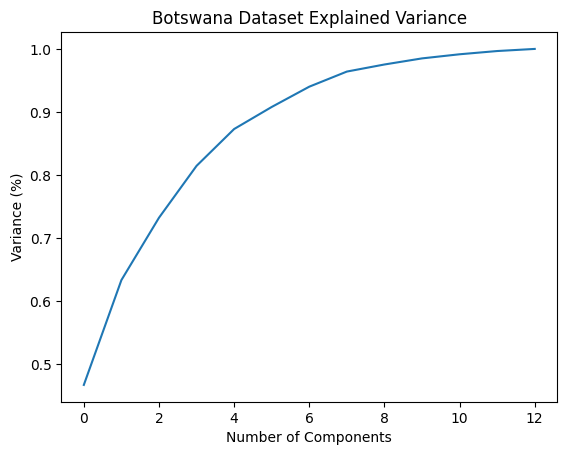

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Botswana Dataset Explained Variance')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
import pandas as pd
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

Accuracy : 96.3076923076923
Cohen Kappa Score : 95.99989743326752
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        50
           4       0.96      1.00      0.98        43
           5       0.94      0.91      0.92        54
           6       0.86      0.91      0.88        54
           7       1.00      0.98      0.99        52
           8       0.98      1.00      0.99        40
           9       0.95      0.94      0.94        63
          10       0.94      0.98      0.96        50
          11       0.98      0.93      0.96        61
          12       0.97      0.94      0.96        36
          13       0.96      0.96      0.96        54
          14       1.00      1.00      1.00        19

    accuracy                           0.96       650
   macro avg       0.97      0.97      0.97       650
weighted avg  